Pre-reqs

In [1]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-cbuae0qk
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-cbuae0qk
  Resolved https://github.com/huggingface/transformers.git to commit 35eac0df75c692c5b93c12f7eaf3279cab8bd7ce
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.2 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7308510 sha256=2a4dc85348aef6a2170ded88363c0f613a6e538c3efa39e7e56b881da6bf1bf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-1e10t7m9/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16

## Download data

In [2]:
%cd /content/
!wget https://download.quranicaudio.com/quran/mustafa_al3azzawi/027.mp3

/content
--2023-07-11 02:43:16--  https://download.quranicaudio.com/quran/mustafa_al3azzawi/027.mp3
Resolving download.quranicaudio.com (download.quranicaudio.com)... 138.199.37.227, 2400:52e0:1e00::863:1
Connecting to download.quranicaudio.com (download.quranicaudio.com)|138.199.37.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22231168 (21M) [audio/mpeg]
Saving to: ‘027.mp3’

027.mp3             100%[===================>]  21.20M  45.6MB/s    in 0.5s    

2023-07-11 02:43:17 (45.6 MB/s) - ‘027.mp3’ saved [22231168/22231168]



## Data Preparation

In [4]:
import librosa
speech_data, sr = librosa.load("/content/027.mp3")
print(len(speech_data))
print(sr)
start = 90.0
end = 105.0
segment = speech_data[int(start*sr):int(end*sr)]

audio_data = librosa.resample(segment, orig_sr = sr, target_sr=16000)

import soundfile as sf
speech_file = "/content/test_small_downsample2.mp3"

sf.write(speech_file, audio_data, samplerate=16000)


30624192
22050


In [6]:
#play audio in colab
from IPython.display import Audio
speech_file = "/content/test_small_downsample2.mp3"
Audio(speech_file)

Data Prep

In [ ]:
audio_data, sr = librosa.load(speech_file)
audio_data = librosa.resample(audio_data, orig_sr = sr, target_sr=16000)


<ipython-input-17-aa34468c1fa0>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(speech_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
len(audio_data) / 12

16412.5

In [ ]:
audio_data.shape[0]

240000

## Model Processing and Inference

In [3]:
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"

model = WhisperForConditionalGeneration.from_pretrained("tarteel-ai/whisper-base-ar-quran").to(device)
processor = WhisperProcessor.from_pretrained("tarteel-ai/whisper-base-ar-quran")

### Inference

In [7]:
inputs = processor.feature_extractor(audio_data, return_tensors="pt", sampling_rate=16_000).input_features.to(device)
predicted_ids = model.generate(inputs, max_length=480_000)
decoded_ids = processor.tokenizer.batch_decode(predicted_ids)

## Prettify Arabic

/content


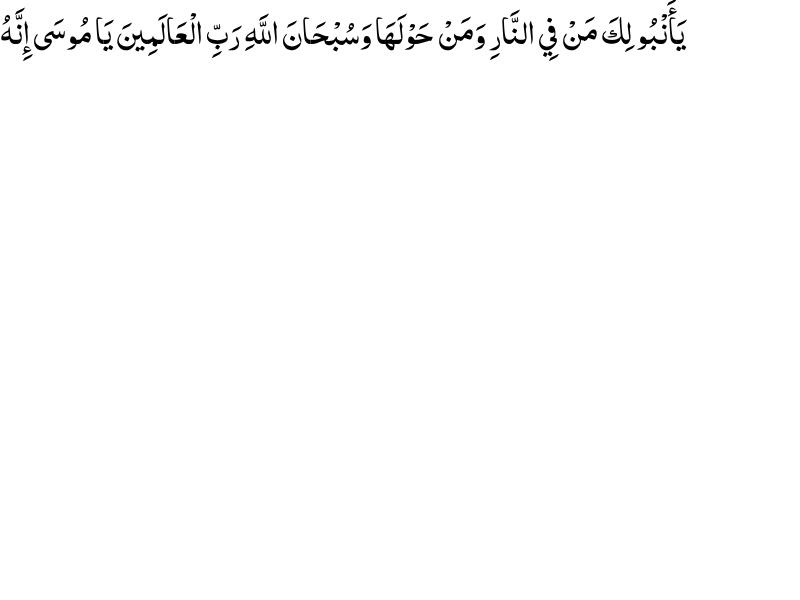

In [10]:
%cd /content
import re

from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
text = re.sub(r'<[^>]*>', '', decoded_ids[0])
# reshaped_p = arabic_reshaper.reshape(text)
# text = get_display(reshaped_p)
blank_image = Image.new('RGB', (800, 600), (255,255,255))
drawing_on_img = ImageDraw.Draw(blank_image)
font = ImageFont.truetype('/content/Al Majeed Quranic Font_shiped.ttf',size=35)
text_color = (201,50,250)
text_coordinates = (0,0)
drawing_on_img.text(text_coordinates,text,font=font,fill='black')
blank_image.save("text_on_test_imager.jpg")
display(Image.open("/content/text_on_test_imager.jpg"))# /content/

